In [1]:
import torch

class BinaryClassification(torch.nn.Module):
    def __init__(self, input_dimension):
        """
        A PyTorch module for binary classification.

        Parameters:
        input_dimension (int): The number of input features.
        """
        super().__init__()
        self.linear = torch.nn.Linear(input_dimension, 1)

    def forward(self, x):
        """
        Forward pass through the binary classification model.

        Parameters:
        x (torch.Tensor): The input tensor of shape (batch_size, input_dimension).

        Returns:
        output (torch.Tensor): The output tensor of shape (batch_size, 1).
        """
        output = self.linear(x)
        return output

In [19]:
def train(model, criterion, optimizer, X_train, Y_train, n_epochs=1000):
    """
    Trains a PyTorch model using the specified loss function and optimizer.

    Parameters:
    model (torch.nn.Module): The PyTorch model to train.
    criterion (torch.nn.modules.loss._Loss): The loss function to use.
    optimizer (torch.optim.Optimizer): The optimizer to use.
    X_train (torch.Tensor): The input tensor of shape (n_samples, n_features) for training.
    Y_train (torch.Tensor): The target tensor of shape (n_samples,) for training.
    n_epochs (int): The number of training epochs.

    Returns:
    train_losses (numpy.ndarray): The training losses for each epoch.
    test_losses (numpy.ndarray): The test losses for each epoch.
    """
    train_losses = np.zeros(n_epochs)
    test_losses = np.zeros(n_epochs)

    for i in range(n_epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Compute test loss
        outputs_test = model(X_test)
        loss_test = criterion(outputs_test, Y_test)

        # Save losses
        train_losses[i] = loss.item()
        test_losses[i] = loss_test.item()

        # Print progress
        if i % 50 == 0:
            print(f"In epoch {i+1}/{n_epochs}, training loss: {loss.item():.4f}, test loss: {loss_test.item():.4f}")

    return train_losses, test_losses

In [15]:
def configure_loss_function():
    """
    Returns a binary cross-entropy loss function with logits.

    Returns:
    torch.nn.BCEWithLogitsLoss: The binary cross-entropy loss function with logits.
    """
    return torch.nn.BCEWithLogitsLoss()

def configure_optimizer(model, lr=0.01):
    """
    Returns a stochastic gradient descent optimizer with the specified learning rate.

    Parameters:
    model (torch.nn.Module): The PyTorch model to optimize.
    lr (float): The learning rate for the optimizer.

    Returns:
    torch.optim.SGD: The stochastic gradient descent optimizer with the specified learning rate.
    """
    return torch.optim.SGD(model.parameters(), lr)

In [4]:
def evaluate(model, X_train, Y_train, X_test, Y_test):
    """
    Computes the accuracy of the model on the training and test sets.

    Parameters:
    model (torch.nn.Module): The PyTorch model to evaluate.
    X_train (torch.Tensor): The input tensor for the training set.
    Y_train (torch.Tensor): The ground-truth labels for the training set.
    X_test (torch.Tensor): The input tensor for the test set.
    Y_test (torch.Tensor): The ground-truth labels for the test set.

    Returns:
    tuple: A tuple of two floats representing the training accuracy and the test accuracy, respectively.
    """
    with torch.no_grad():
        p_train = model(X_train)  # forward pass on the training set
        p_train = (p_train.numpy() > 0)  # convert the probabilities to binary predictions
        train_acc = np.mean(Y_train.numpy() == p_train)  # compute the training accuracy
        p_test = model(X_test)  # forward pass on the test set
        p_test = (p_test.numpy() > 0)  # convert the probabilities to binary predictions
        test_acc = np.mean(Y_test.numpy() == p_test)  # compute the test accuracy
    return train_acc, test_acc

In [5]:
import numpy as np
from sklearn.datasets import load_breast_cancer

C:\Users\denis\anaconda3\envs\Geeshot\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
data=load_breast_cancer()
X,Y=data.data,data.target

In [7]:
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)

In [9]:
from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()  # create an instance of the StandardScaler class
X_train=scaler.fit_transform(X_train)  # scale the training data using the scaler object
X_test=scaler.fit_transform(X_test)  # scale the test data using the same scaler object

In [10]:
# convert data to PyTorch tensors
X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
Y_train=torch.from_numpy(Y_train.astype(np.float32).reshape(-1,1))
Y_test=torch.from_numpy(Y_test.astype(np.float32).reshape(-1,1))

In [13]:
# initiate model
num_of_samples,input_dimension=X_train.shape
model=BinaryClassification(input_dimension)

In [20]:
criterion=configure_loss_function()  # Configure the loss function
optimizer=configure_optimizer(model)  # Configure the optimizer
train_losses,test_losses=train(model,criterion,optimizer,X_train,Y_train)  # Train the model

In this epoch 1/1000,Training loss:0.7092, Test loss:0.6864
In this epoch 51/1000,Training loss:0.3561, Test loss:0.3393
In this epoch 101/1000,Training loss:0.2692, Test loss:0.2535
In this epoch 151/1000,Training loss:0.2268, Test loss:0.2115
In this epoch 201/1000,Training loss:0.2007, Test loss:0.1855
In this epoch 251/1000,Training loss:0.1827, Test loss:0.1676
In this epoch 301/1000,Training loss:0.1693, Test loss:0.1543
In this epoch 351/1000,Training loss:0.1591, Test loss:0.1441
In this epoch 401/1000,Training loss:0.1509, Test loss:0.1360
In this epoch 451/1000,Training loss:0.1443, Test loss:0.1293
In this epoch 501/1000,Training loss:0.1388, Test loss:0.1238
In this epoch 551/1000,Training loss:0.1341, Test loss:0.1190
In this epoch 601/1000,Training loss:0.1301, Test loss:0.1150
In this epoch 651/1000,Training loss:0.1266, Test loss:0.1115
In this epoch 701/1000,Training loss:0.1236, Test loss:0.1083
In this epoch 751/1000,Training loss:0.1208, Test loss:0.1056
In this epo

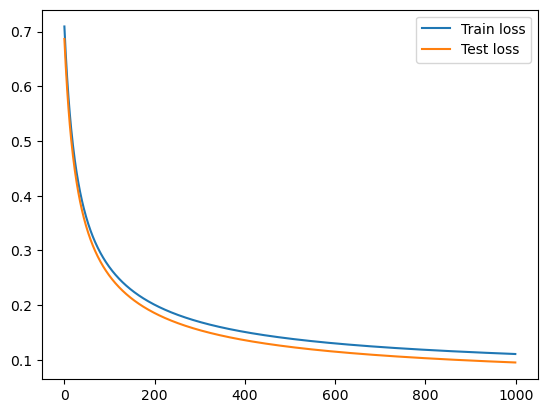

In [21]:
#plot loss
import matplotlib.pyplot as plt
plt.plot(train_losses,label='Train loss')
plt.plot(test_losses,label='Test loss')
plt.legend()
plt.show()

In [22]:
train_acc,test_acc=evaluate(model,X_train,Y_train,X_test,Y_test)  # evaluate model
print(train_acc)
print(test_acc)

0.9765395894428153
0.9824561403508771
